<a href="https://colab.research.google.com/drive/1S5jz0fJhF_aXQZmUHUFcexX6y5PV_0Rs?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt = "Colaboratory logo" width = "15%" src = "https://github.com/guilhermeaugusto9/sigmoidal/raw/master/03%20-%20Outros/Logo%20Guilherme%20Augusto.png"></center>

#### **Data Science e Análise de dados**
*by [Guilherme Augusto](https://github.com/guilhermeaugusto9)

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e fintechs. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<center><img alt = "Colaboratory logo" width = "80%" src = "https://www.securityreport.com.br/wp-content/uploads/2016/11/Shutterstock-wk1003mike.jpg"></center>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em Data Science.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Fraudes com cartão disparam na pandemia

O aumento das compras no comércio eletrônico durante o isolamento social fez disparar as fraudes envolvendo cartão de crédito. 

Quase metade das fraudes acontece em transações pela internet. A delegacia de crimes eletrônicos de São Paulo chegou a várias quadrilhas, que apostam na inovação para alcançar cada vez mais vítimas, em especial durante a pandemia.

Levantamento do SPC aponta que em apenas 12 meses, quase 9 milhões de brasileiros foram vítimas desse tipo de fraude

<center><img alt = "Colaboratory logo" width = "50%" src = "https://guiadecredito.net/wp-content/uploads/2019/03/fraudes-cartao-de-credito.jpg"></center>

## Objetivo deste projeto

Este projeto representa para mim um passo a mais no estudo de Ciência de dados, trabalhei nos projetos anteriores disponíveis em meu [Github](https://github.com/guilhermeaugusto9/sigmoidal/tree/master/02%20-%20Projetos%20Guilherme) a parte de preparação, visualização e análise, agora iniciarei com a implementação de algorítmos de Machine Learning, trabalhando inicialmente com a biblioteca [Scikit-learn](https://scikit-learn.org/stable/).

Para este projeto, como já introduzimos irei buscar uma forma de prever fraudes em cartões de crédito, este que é um problema super atual e que afeta, como vimos, milhões de pessoas.

<center><img alt = "Colaboratory logo" width = "80%" src = "https://miro.medium.com/max/3840/1*DrfIQnE5gOFb4TvObahiZg.jpeg"></center>

# Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O dataset representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Outro detalhe interessante é que as features são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por [V1,V2,V3...V28]

Os dados estão disponíveis na indispensável a todos que querem aprender Ciencia de dados [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)



<center><img alt = "Colaboratory logo" width = "40%" src = "https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png"></center>

Na página original dos dados, também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (Principal Component Analysis - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados componentes.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas  [V1,V2,V3...V28]

 .

Para facilitar a aquisição dos dados, o meu professor [Carlos Melo](https://www.linkedin.com/in/carlosfab/), que eu sou aluno no curso Data Science na pratica criou um acesso direto ao csv. Com isso, basta importar o conjunto de dados usando o método pd.read_csv().

In [8]:
#@title
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [9]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

In [10]:
# importar os dados para um dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura Dataframe - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de Machine Learning.

# Análise Exploratória

Iremos primeiramente descobrir quantas entradas possui esta base e posteriormente analisar as 5 primeras entradas

In [11]:
# verificar o tamanho do DataFrame
print("Variáveis: ", df.shape[1])
print("Entradas: ", df.shape[0])

Variáveis:  31
Entradas:  284807


In [12]:
# visualizar as 5 primeiras entradas

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Apenas olhando as cinco primeiras entradas é possível tirar algumas conclusões:

* As 5 primeiras entradas permitem entender como a transformação PCA deixou as features descaracterizadas (anônimas) e em valores numéricos. Para saber mais sobre PCA, clique neste link.

* As colunas Time e Amount foram preservadas, mantendo seu valor original.

* A variável alvo está representada na coluna Class, onde: 0: Transação normal; e
1: Transação fraudulenta;

É interessante também, quando inciamos uma análise exploratória, a visualização de um resumo estatístico, que nos proporciona a compreensão se existem outlieres e outras informações como: Desvio padrão, média, mediana, quartis e valores máximos.

Iremos neste ponto da análise também aplicar uma função apenas para checar se a base contem valores faltantes, o que acredito que não ocorra, por já ser uma base tratada, mas como Cientistas de dados , não podemos nos ater a suposições, mas devemos investigar.

In [13]:
# ver os valores faltantes das colunas
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

Como suspeitavamos, a base não contem valores faltantes, o que é muito positivo. Passaremos agora para a análise estatística.

A linguagem de programação Python que usamos para este projeto proporciona esta análise completa em apenas uma linha como veremos.

In [14]:
# ver o resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Verificando acima o resumo estatístico, por meio do método describe(), podemos confirmar que as variáveis relativas aos componentes principais (transformação PCA) não têm nenhuma discrepância aparente, bem como a coluna Time.

Em relação à variável Amount, nota-se que o valor médio de transações (considerando ambas as classes) é 88.34, mediana igual a 22.00 e desvio padrão de 250.12. Atingindo o valor máximo de 25691.16, a maioria das transações financeiras é composta em sua maioria por quantias menores - como esperado.

## Dados desbalanceados

Na descrição da base, no início deste projeto, descrevemos que o percentual de fraudes seria muito pequeno, o que é a princípio bem óbvio, pois, por mais que as fraudes estejam em uma crescente no mundo real ocorrem infinitamente mais provavel que uma transação seja legal e dentro da lei do que uma transação realizada por um criminoso.

Vamos explicitar esta diferença por meio de um gráfico, mostrando de forma visual, o que é um elemento importantíssimo para todo cientista, conseguir exprimir não apenas por números mas por gráficos.

Esta discrepância irá deixar claro que teremos que balancear a base para a criação de um algorítmo de Machine Learning, caso contrário estaremos incorrendo em um erro gravíssimo de concepção do modelo.

In [15]:
# ver o balanceamento das classes 

print(df.Class.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.Class==1].shape[0]/df.shape[0])*100))


0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



[]

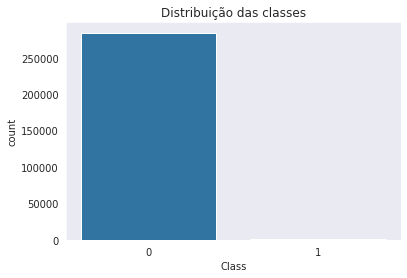

In [16]:
# Plotar gráfico de barras para as Classes

fig, ax = plt.subplots()
sns.countplot('Class', data = df, ax = ax)
ax.set_title('Distribuição das classes')
plt.plot()


O gráfico mostra o como é discrepante e evidencia como dissemos anteriomente que devemos rebalancear a base para criar um modelo de predição.

Iremos plotar agora um boxplot para visualizar se existe alguma diferença entre as transações normais e fraudulentas, o que pode ajudar o modelo a ser mais apurado

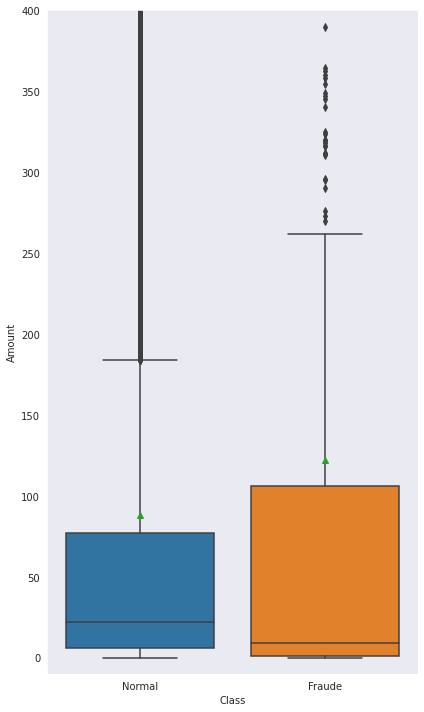

In [17]:
# Plotando os boxplots

fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans =True, ax=ax)
plt.ylim(-10,400)
plt.xticks([0,1],['Normal','Fraude'])

plt.tight_layout()

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente.

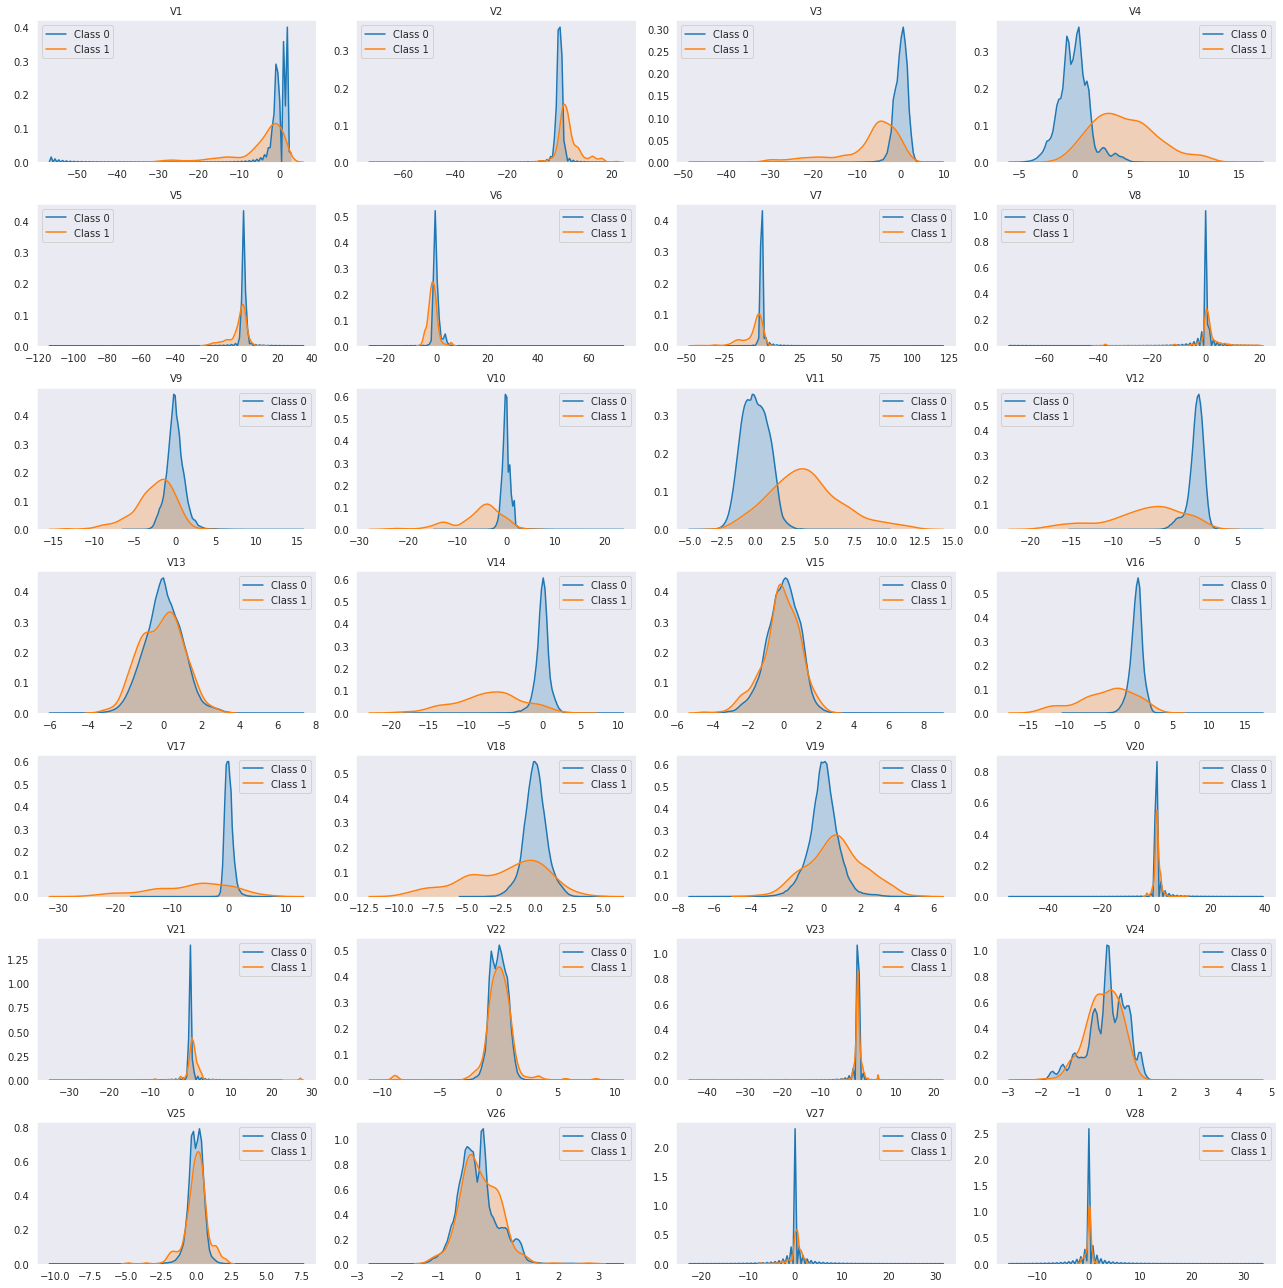

In [36]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

AS categorias se comportam de maneira semelhante em praticamente todas as categorias, entretanto para a V7, V22 e V15 verificamos um comportamento diferente, o que nos ajudará na concepção do nosso modelo.

Resumidamente, algumas observações principais que puderam ser extraídas dessa etapa exploratória foram:

* O dataset está muito desbalanceado, uma vez que as transações fraudulentas representam apenas 0,17% das entradas totais.
* Não existem valores ausentes ou nulos no dataframe.
* Uma vez que a PCA é sensível à escala das variáveis, assume-se a premissa que as features originais foram padronizadas.
* As colunas Time e Amount não estão normalizadas.

# Preparando os dados

Para que os dados possam alimentar o modelo de Regressão Logística que iremos construir, nesta etapa de preparação iremos:

Padronizar as features Time e Amount, que estão em outra ordem de grandeza.
Dividir entre dados de treino e teste
Balancear os dados a fim de evitar uma baixa performance para a classe 1 e overfitting.

Padronizar Time e Amount

Para esta etapa, uma vez que a coluna Amount possui outliers será usada a padronização por meio da classe StandardScaler.

In [19]:
# padronizar as colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Dividir entre conjuntos de treino e teste

Antes de proceder com o balanceamento de dados, devemos splitar os dados já existentes entre treino e teste. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado.

Para garantir que os conjuntos de treino e teste tenham a mesma quantidade de classes proporcionalmente, passamos stratify=True.

In [20]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

Balanceamento dos dados

Usando a biblioteca imblearn é possível aplicar facilmente técnicas de balanceamento de dados. No caso, a opção neste projeto foi usar Under-sampling, preservando a classe minoritária.

É fácil ver que não há mais aquela discrepância inicial (gráfico de barras no início deste notebook).

1    369
0    369
dtype: int64


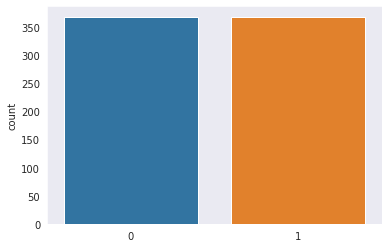

In [21]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);

Após a nossa base estar balanceada agora sim , poderemos prosseguir com a confeção do nosso modelo de Machine Learning.

Como este é o primeiro projeto de Machine Learning que faço, irei utilizar apenas uma técnica, que um cientista mais experiente pode achar simples, mas em minha opinião é muito ilustrativa principalmente para quem esta começando.

Seguiremos o roteiro aprendido no maravilhoso livro Python Data Science Handbook de Jake VanderPlas.

O roteiro consiste em:
   1. escolher e importar um modelo
   2. Instanciar e escolher os hyperparameters
   3. Separar os dados entre feature matrix e target vector 

    3.1 Dividir o dataset entre treino e teste

    3.2 Padronizar os dados de treino
   4. Fit do modelo (treinar)
   5. Fazer previsões em cima de novos dados
   6. Realizar a avaliação do modelo


In [22]:
# 1. escolher e importar um modelo

from sklearn.linear_model import LogisticRegression



In [24]:
# 2. Instanciar e escolher os hyperparameters
np.random.seed(2)
model = LogisticRegression()


In [29]:

# 3. Separar os dados entre feature matrix e target vector 

X = df_clean.drop('Class', axis=1)
y = df['Class']

In [30]:
# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)



In [31]:
# 3.2 Padronizar os dados de treino
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)


In [32]:

# 4. Fit do modelo (treinar)
model.fit(X_rus, y_rus)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9693    0.9843     71079
           1     0.0484    0.9024    0.0918       123

    accuracy                         0.9692     71202
   macro avg     0.5241    0.9359    0.5381     71202
weighted avg     0.9982    0.9692    0.9828     71202

Acurácia: 0.9692

AUC: 0.9359



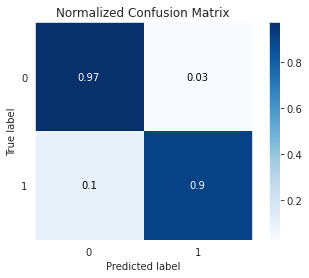

In [35]:
# 6. Avaliação do modelo 

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Para uma situação como a que abordamos no problema a métrica mais importante seria o Recall, como bem falado neste [artigo](https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c) do Victor Rodrigues:
"O recall pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes (situação de Falso Positivo) no processo. Ou seja, o modelo deve ter alto recall, pois classificar pacientes doentes como saudáveis pode ser uma tragédia." 

As fraudes de cartão então se enquadram nessa faixa, em que uma transação fraudelenta ser clasificada como uma transação normal é mais prejudicial  do que em alguns casos como já deve ter ocorrido com todos nós uma transação ser bloqueada pelo banco pois ele acredita ser fraude mesmo não sendo.

# Conclusões

Como você pode observar, não se trata de um problema trivial. Apesar dos dados estarem bem tratados e limpos, sem valores ausentes ou variáveis categóricas, o desbalanceamento e a Transformação PCA demandaram um trabalho considerável.

Obviamente, apesar do bom resultado final, há espaço para testar o desempenho com outros algoritmos de classificação, além de otimizar seus parâmetros.

Por hora acredito que o resultado foi extremamente positivo, pelo aprendizado que obtive realizando este projeto e pela base que ele trará para a realização dos outros que virão.
